In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import pubchempy as pcp
IPythonConsole.molSize = 500,500

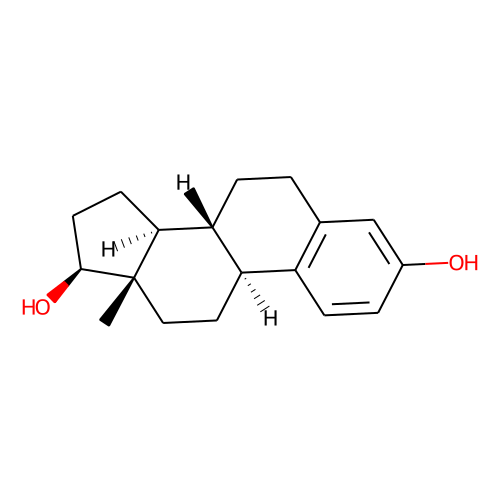

In [5]:
## Visualization using PubChem CID ##

Estrogen_SMILES = Chem.MolFromSmiles("C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C3C=CC(=C4)O")
Estrogen_SMILES

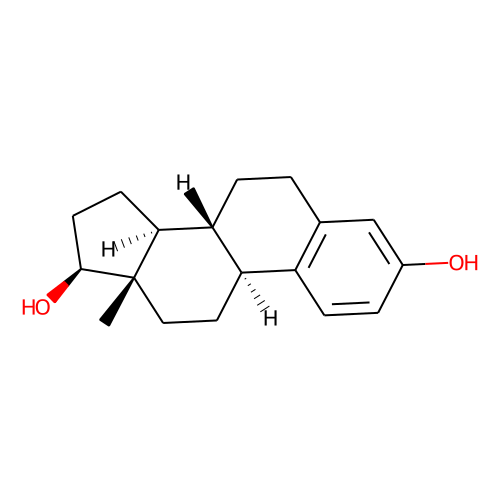

In [25]:
## Visualization using PubChem CID ##

# You can also make 2D chemical structure if you only know PubChem CID, not SMILES #

Estrogen_PubChem_CID_trans = pcp.get_properties('IsomericSMILES', 5757)
Estrogen_PubChem_CID = Chem.MolFromSmiles(Estrogen_PubChem_CID_trans[0]['IsomericSMILES'])
Estrogen_PubChem_CID

[{'CID': 5757, 'IsomericSMILES': 'C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C3C=CC(=C4)O'}]
[{'CID': 6013, 'IsomericSMILES': 'C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=CC(=O)CC[C@]34C'}]
[{'CID': 681, 'IsomericSMILES': 'C1=CC(=C(C=C1CCN)O)O'}]
[{'CID': 5816, 'IsomericSMILES': 'CNC[C@@H](C1=CC(=C(C=C1)O)O)O'}]
[{'CID': 5202, 'IsomericSMILES': 'C1=CC2=C(C=C1O)C(=CN2)CCN'}]
[{'CID': 187, 'IsomericSMILES': 'CC(=O)OCC[N+](C)(C)C'}]


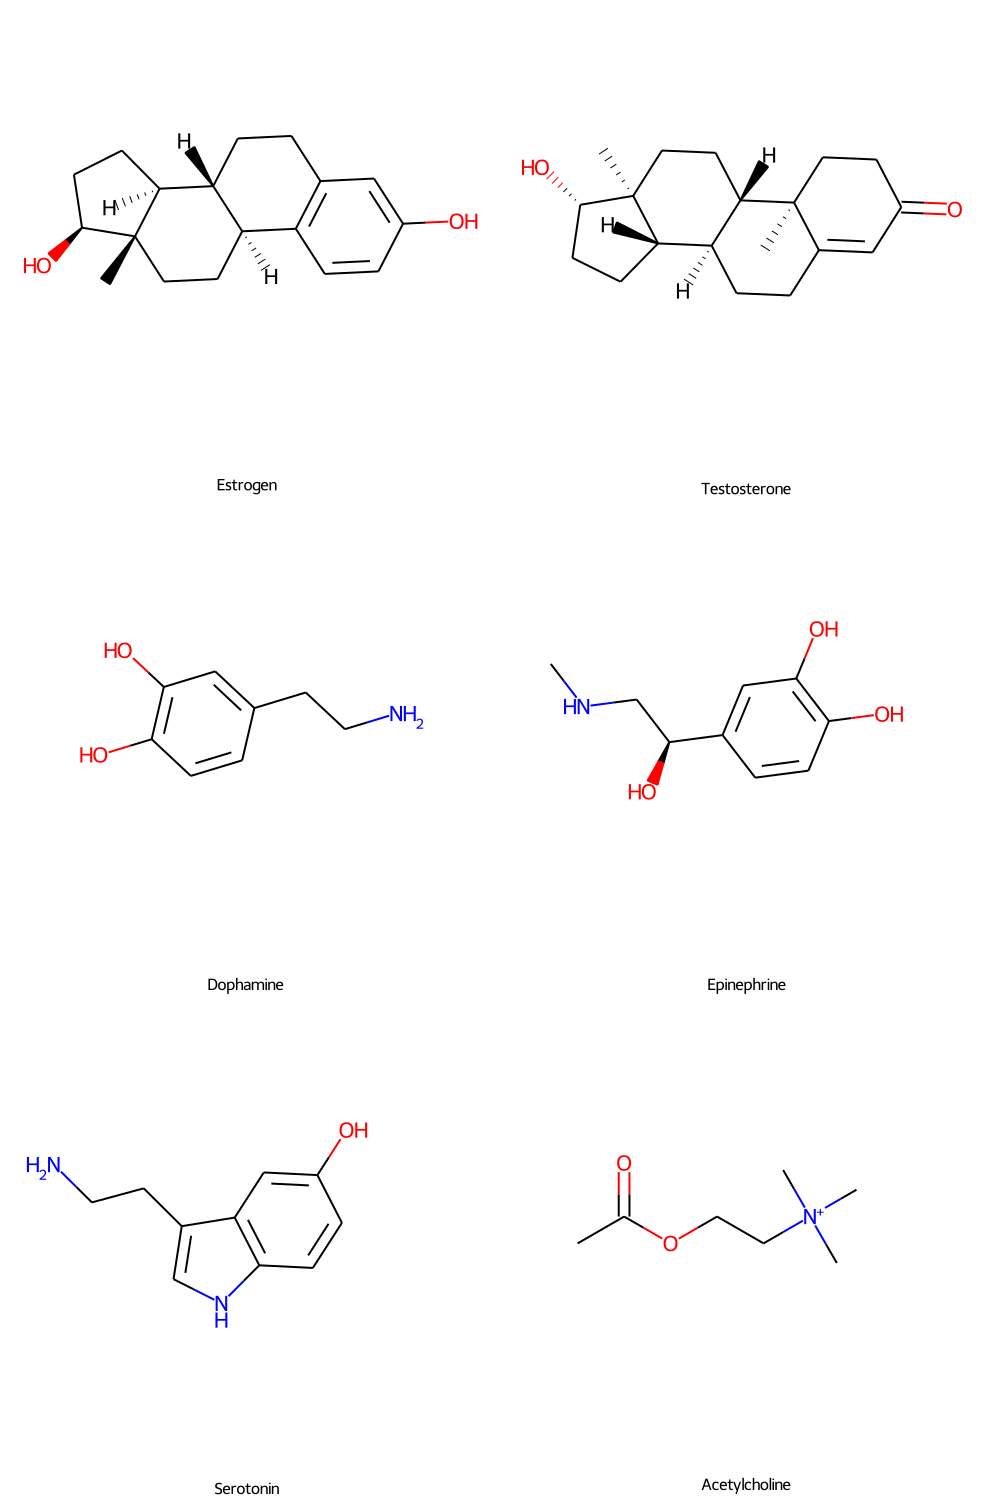

In [26]:
## Visualization using PubChem CID list ##

# By using for loop, you can make a image including multiple chemical structures #

chemical_dict = {'Estrogen' : '5757',
                 'Testosterone' : '6013',
                 'Dophamine' : '681',
                 'Epinephrine' : '5816',
                 'Serotonin' : '5202',
                 'Acetylcholine' : '187'}
name_list = []
id_list = []
smiles_list = []
mol_list = []

for i in chemical_dict.items():
    name_list.append(i[0])
    id_list.append(i[1])
    smiles = pcp.get_properties('IsomericSMILES', i[1])
    print(smiles)
    smiles_list.append(smiles[0]['IsomericSMILES'])
    
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)
    
img = Draw.MolsToGridImage(mol_list,
                           molsPerRow = 2,
                           subImgSize = (500, 500),
                           legends = name_list)

img

# Ref: https://github.com/rdkit/rdkit/issues/2994
# Ref: https://qiita.com/ottantachinque/items/7233f5038d59461862ff